In [1]:
%pip install wordcloud matplotlib pandas pythainlp -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from pythainlp.tokenize import word_tokenize

In [3]:
data = [
    "สวัสดี",
    "สัญญาประกันรถยนต์",
    "สัญญาประกันรถยนต์",
    "สัญญาประกันรถยนต์",
    "สัญญาประกันรถยนต์",
    "สัญญาประกันรถยนต์",
    "สัญญาประกันรถยนต์",
    "สัญญาประกันรถยนต์",
    "สัญญาประกันรถยนต์",
    "สัญญาประกันรถยนต์",
    "สัญญาประกันรถยนต์",
    "สัญญาประกันรถยนต์",
    "สัญญาประกันรถยนต์",
    "สัญญาประกันรถยนต์",
    "ลูกค้าไม่ยอมรับการเวนคืนสัญญาประกันอุบัติเหตุ",
    "ชำระค่างวดปิดบัญชี",
    "สัญญาประกันรถยนต์",
    "สัญญาประกันรถยนต์",
    "สัญญาประกัน ABC Bunny",
    "v",
    "สัญญาประกัน ABC Bunny",
    "สัญญาประกัน ABC Bunny",
    "สัญญาประกัน ABC Bunny",
    "ลูกค้าจะต้องทำอย่างไรหากไม่ยอมรับการเวนคืนในสัญญาประกัน ABC Bunny",
    "ลูกค้าจะต้องทำอย่างไรหากไม่ยอมรับการเวนคืนในสัญญาประกัน ABC Bunny",
    "สัญญาประกัน ABC Bunny",
    "สัญญาประกัน ABC Bunny",
    "สัญญาประกัน ABC Bunny",
    "สัญญาประกัน ABC Bunny",
    "ลูกค้าจะต้องชำระค่างวดปิดบัญชีสำหรับสัญญาประกันรถยนต์",
    "สัญญาประกัน ABC Bunny",
    "สัญญาประกัน ABC Bunny",
    "สัญญาประกัน ABC Bunny",
    "สัญญาประกัน ABC Bunny",
    "สัญญาประกัน ABC Bunny",
    "ลูกค้าสามารถทำอะไรได้บ้างเมื่อไม่ยอมรับการเวนคืนในกรณีของสัญญาประกัน ABC Bunny",
    "สัญญาประกัน ABC Bunny",
    "สัญญาประกัน ABC Bunny",
    "จุดเด่นผลิตภัณฑ์",
    "จุดเด่นผลิตภัณฑ์",
    "จุดเด่นผลิตภัณฑ์",
    "จุดเด่นผลิตภัณฑ์",
    "จุดเด่นผลิตภัณฑ์",
    "จุดเด่นผลิตภัณฑ์",
    "จุดเด่นผลิตภัณฑ์",
    "จุดเด่นของประกันโรคมะเร็งของบริษัทซมโปะคืออะไร",
    "จุดเด่นของประกันโรคมะเร็งของบริษัทซมโปะคืออะไร",
    "ระยะเวลาคุ้มครองประกันโรคมะเร็งของบริษัทซมโปะเป็นอย่างไร",
    "ลูกค้าขอชำระค่างวดประกันหลังถูกเวนคืน ต้องดำเนินการอย่างไร",
    "จุดเด่นผลิตภัณฑ์",
    "จุดเด่นผลิตภัณฑ์",
    "จุดเด่นผลิตภัณฑ์",
    "จุดเด่นผลิตภัณฑ์",
    "จุดเด่นผลิตภัณฑ์",
    "จุดเด่นผลิตภัณฑ์",
    "จุดเด่นผลิตภัณฑ์",
    "ช่องทางการซื้อประกัน",
    "ช่องทางการซื้อประกัน และเงื่อนไข",
    "เงื่อนไขและระยะเวลาผู้เอาประกันภัย มีอะไรบ้าง",
    "เงื่อนไขการรักษาผู้เอาประกันภัยเมื่อได้รับการวินิจฉัยว่าเป็นโรคมะเร็ง มีอะไรบ้าง",
    "สอบถามสัญญาประกันรถยนต์",
    "สัญญาประกันรถยนต์"
]

/Users/j.papontee/miniconda3/envs/PIM-NLP/lib/python3.9/site-packages/attacut/models/__init__.py:60: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torc

สวัสดี สัญญา สัญญา สัญญา สัญญา สัญญา สัญญา สัญญา สัญญา สัญญา สัญญา สัญญา สัญญา สัญญา ลูกค้า ชำระค่าง สัญญา สัญญา สัญญา v สัญญา สัญญา สัญญา ลูกค้า ลูกค้า สัญญา สัญญา สัญญา สัญญา ลูกค้า สัญญา สัญญา สัญญา สัญญา สัญญา ลูกค้า สัญญา สัญญา จุดเด่น จุดเด่น จุดเด่น จุดเด่น จุดเด่น จุดเด่น จุดเด่น ของ ของ ระยะ ลูกค้า จุดเด่น จุดเด่น จุดเด่น จุดเด่น จุดเด่น จุดเด่น จุดเด่น ช่องทาง ช่องทาง เงื่อนไข การ สอบถาม สัญญา


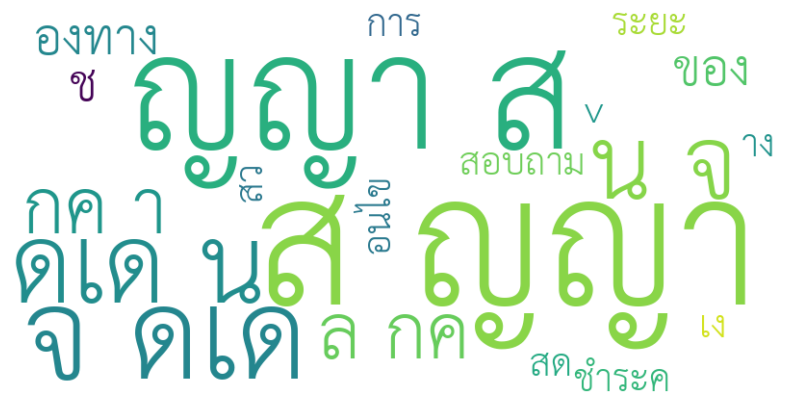

In [4]:
# รวมข้อความทั้งหมด
text = " ".join(data)

# ล้างข้อความ
clean_text = re.sub(r"[a-zA-Z0-9%()]", "", text)  # ลบตัวอักษรที่ไม่ต้องการ

# แยกคำภาษาไทย
tokenized_sentences = [word_tokenize(sentence, engine="attacut", join_broken_num=True) for sentence in data]

# เลือกคำที่สำคัญที่สุดในแต่ละประโยค
important_words = []
for tokens in tokenized_sentences:
    # นับความถี่ของคำในแต่ละประโยค
    word_freq = Counter(tokens)
    # เลือกคำที่พบบ่อยที่สุด
    if word_freq:
        important_words.append(max(word_freq, key=word_freq.get))

# รวมคำที่สำคัญทั้งหมด
important_text = " ".join(important_words)

# สร้าง Word Cloud
wordcloud = WordCloud(
    font_path="THSarabunNew.ttf",  # ฟอนต์ภาษาไทย
    width=800,
    height=400,
    background_color="white"
).generate(important_text)
print(important_text)

# แสดงผล
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()